# Model Project by VEM

# Part 1 - The General Solow Model

## Introduction
In this project, we create a framework, which solves the General Solow Model...

In this setup, we have:

- $K_t$ is capital
* $Y_t$ is output
* $L_t$ is labour, which evolves at the rate of *n*
* $A_t$ is technology, which evolves at rate of *g*
* $\delta$ is the rate of depreciation
* And *s* is the savings rate.

The production function is:

$Y_t=K_t^{\alpha}L_t^{\alpha-1}$

And capital accumulates according to:

$K_{t+1}=sY_t+(1-\delta)K_t$

Where the transition equation is:

$\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s \tilde{k}_t^{\alpha}+(1-\delta)\tilde{k}_t)$, where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$

Finally, steady state of capital per effective worker:

$\tilde{k}^* = \left(\frac{s}{\delta+n+g+ng}\right)^\frac{1}{1-\alpha}$

## Import
We begin by importing all the necessary packages.

In [1]:
import numpy             as np
import sympy             as sm
import matplotlib.pyplot as plt
import scipy.optimize    as opt
import math
import ipywidgets        as widgets

print("Packages successfully imported.")

Packages successfully imported.


## Parameter specification
Below, we firstly define the parameters of the model as sympy symbols. Secondly, we then specify a specific value for each of the parameters. These can be changed per request.

In [2]:
# Defines parameters
g     = sm.symbols('g')        # Growth of TFP
n     = sm.symbols('n')        # Growth of population
alpha = sm.symbols('alpha')    # Capital share
delta = sm.symbols('delta')    # Rate of depreciation
s     = sm.symbols('s')        # Savings rate
k_ss  = sm.symbols('k_ss')     # Capital per effective worker in ss

# Specifies parameter values
g     = 0.02
n     = 0.02
alpha = 1/3
delta = 0.05
s     = 0.30

print("Parameters successfully set.")

Parameters successfully set.


## Solution and simulation of steady state
The steady state of capital per effective worker is defined as:

$\tilde{k}^* = \left(\frac{s}{\delta+n+g+ng}\right)^\frac{1}{1-\alpha}$

We firstly solve this symbolic below.

In [3]:
# Steady state equation of k
k_ss_symbolic = (s / (delta+n+g+(n+g)))**(1 / (1-alpha))

print(f'Symbolic method: Steady state of capital per effective worker: {k_ss_symbolic:.8f}')

Symbolic method: Steady state of capital per effective worker: 3.50563627


We now solve the capital per effective worker through a simple bisection procedure, i.e. solve the function:

$\tilde{k}^* - \left(\frac{s}{\delta+n+g+ng}\right)^\frac{1}{1-\alpha}$ = 0

And then compare it to the symbolic solution above.

In [4]:
# Solves the function, f = 0 

f = lambda k_ss_num: k_ss_num - (s / (delta+n+g+(n+g)))**(1 / (1-alpha))

def bisection(f,a,b,tol=1e-8):

    # Test inputs
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        f_m_n = f(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

k_ss = bisection(f,0,100,1e-8)

print('Comparison of solution methods:')
print('')
print(f'Symbolic:  Steady state of capital per effective worker: {k_ss_symbolic:.8f}')
print(f'Numerical: Steady state of capital per effective worker: {k_ss:.8f}')

Comparison of solution methods:

Symbolic:  Steady state of capital per effective worker: 3.50563627
Numerical: Steady state of capital per effective worker: 3.50563626


Here, we see that the solution methods are - more or less - equivalent. 

Through the creation of an auxiliary equation, *$aux$*, we now simulate the equilibrium path of the economy.

In [5]:
def aux(x,g,n,s,alpha,delta):
    aux = (1/((1+g)*(1+n)))*((s*(x/((1+g)*(1+n)))**alpha) + ((1-delta)*(x/((1+g)*(1+n)))))
    return aux

T    = 200             # Number of periods
k    = np.zeros((T,1)) # Creates an array of periods
k[0] = 0               # Initial value of k

for t in range(T-1):   # Loops through each t of T
    k[t+1] = aux(k[t],g,n,s,alpha,delta)
    
print("Simulation ran successfully.")

Simulation ran successfully.


## Plotting the phase diagram
Lastly, we plot the transition of capital per effective worker in a standard phase diagram.

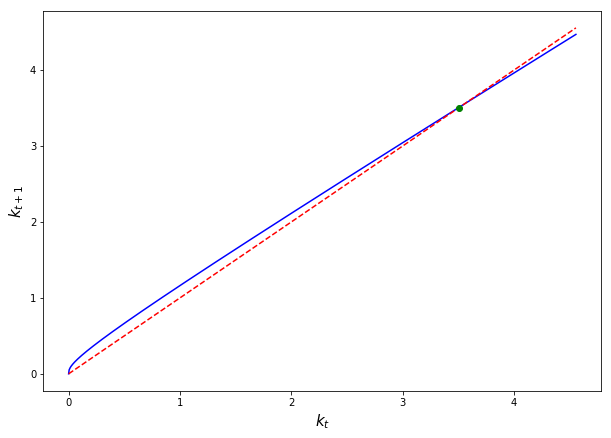

In [6]:
kmin  = 0                             # Minimum x-value of the plot
kmax  = k_ss*1.3                      # Maximum x-value of the plot
k_set = np.linspace(kmin, kmax, 1000) # Boundaries of x- and y-axis

phase = plt.figure(figsize=(10,7))    # Defines the phase diagram
plt.plot(k_set, aux(k_set,g,n,s,alpha,delta), 'b-',    # Plots transition line
         k_set, k_set, 'r--',         # 45-degree line
         k_ss, k_ss,   'go')          # Plots point of steady state
plt.xlabel('$k_{t}$',   size=15)      # Labels x-axis
plt.ylabel('$k_{t+1}$', size=15)      # Labels y-axis

plt.show()

Finally, we plot an interactive phase diagram containing a slider for each of the parameters.

In [7]:
kmin  = 0                              # Minimum x-value of the plot
kmax  = k_ss*100                       # Maximum x-value of the plot
k_set = np.linspace(kmin, kmax, 10000) # Boundaries of x- and y-axis

def Transition(g,n,delta,s,alpha):
    
    plt.figure(figsize=(10,7))                           # Defines figure size
    k_ss = (s / (delta+n+g+(n+g)))**(1 / (1-alpha))      # Defines function
    plt.xlim(0, k_ss*1.3)                                # Defines limits
    plt.ylim(0, k_ss*1.3)                                # Defines limits
    plt.locator_params(which='x', tight=True, nbins=10)  # Locates sliders
    plt.xlabel('$k_{t}$',   size=15)                     # Labels x-axis
    plt.ylabel('$k_{t+1}$', size=15)                     # Labels y-axis
    plt.plot(k_set,aux(k_set,g,n,s,alpha,delta), '-b'),  # Plots
    plt.plot(k_set,k_set, '--r')                         # Plots
    plt.title('Phase diagram', size=25)                  # Creates title
    return print(f'The steady state for capital per effective worker is: {k_ss:.2f}')

widgets.interact(Transition,                             # Defines slider
                 s     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.3),
                 n     = widgets.FloatSlider(min=0,max=0.3,step=0.01,value=0.02),
                 alpha = widgets.FloatSlider(min=0,max=2/3,step=0.01,value=1/3),
                 g     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.02),
                 delta = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.05))

interactive(children=(FloatSlider(value=0.02, description='g', max=1.0, step=0.01), FloatSlider(value=0.02, de…

<function __main__.Transition(g, n, delta, s, alpha)>

# Part 2 - The General Solow Model with Land
With the extension of land, we now have the following production function:

$Y_t=K_t^{\alpha}{(A_t L_t)^\beta}X^\kappa$

Where $X$ has no time subscript, since land is in fixed supply.

## Parameter specification
We now define the new parameters.

In [8]:
# Defines new parameters
beta  = sm.symbols('beta')    # Labour share
kappa = sm.symbols('kappa')   # Land share

# Specifies parameter values
beta  = 1/3
kappa = 1-alpha-beta

print("Parameters successfully set.")

Parameters successfully set.


## Solution and simulation of steady state

Instead of solving this model in terms of capital per effective worker, we solve it in terms of capital-output ratio, $z_t$. Here, the steady state of $z^*$ is given by:

$z^* = \left(\frac{s}{[(1+n)(1+g)]^\frac{\beta}{\beta+\kappa}-(1-\delta)}\right) > 0$

Again, we do this symbolic first.

In [9]:
# Steady state equation of z
z_ss_symbolic = (s / (((1+n)*(1+g))**(beta / (beta+kappa))-(1-delta)))

print(f'Symbolic method: Steady state of capital-output ratio: {z_ss_symbolic:.8f}')

Symbolic method: Steady state of capital-output ratio: 4.28571429


And now with bisection, where we solve:

$z^* - \left(\frac{s}{[(1+n)(1+g)]^\frac{\beta}{\beta+\kappa}-(1-\delta)}\right) = 0$

In [10]:
# Solves the function, f = 0 

f = lambda z_ss: z_ss - (s / (((1+n)*(1+g))**(beta / (beta+kappa))-(1-delta))) 

def bisection(f,a,b,tol=1e-8):

    # Test inputs
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        f_m_n = f(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

z_ss = bisection(f,0,100,1e-8)

print('Comparison of solution methods:')
print('')
print(f'Symbolic:  Steady state of capital-output ratio: {z_ss_symbolic:.8f}')
print(f'Numerical: Steady state of capital-output ratio: {z_ss:.8f}')

Comparison of solution methods:

Symbolic:  Steady state of capital-output ratio: 4.28571429
Numerical: Steady state of capital-output ratio: 4.28571429


Again, we see that the solution methods are equivalent.

Through the creation of an auxiliary equation, *$aux_z$*, we now simulate the equilibrium path of the economy.

In [11]:
def aux_z(z,g,n,s,alpha,delta,beta):
    aux_z = (1/((1+g)*(1+n)))**beta*(((s+(1-delta)*z)**(1-alpha))*z**alpha)
    return aux_z

T     = 200              # Number of periods
k1    = np.zeros((T,1))  # Creates an array of periods
k1[0] = 0                # Initial value of k

for t in range(T-1):     # Loops through each t of T
    k1[t+1] = aux_z(k1[t],g,n,s,alpha,delta,beta)
    
print("Simulation ran successfully.")

Simulation ran successfully.


## Plotting the phase diagram
Lastly, we plot the transition of the capital-output ratio in a standard phase diagram.

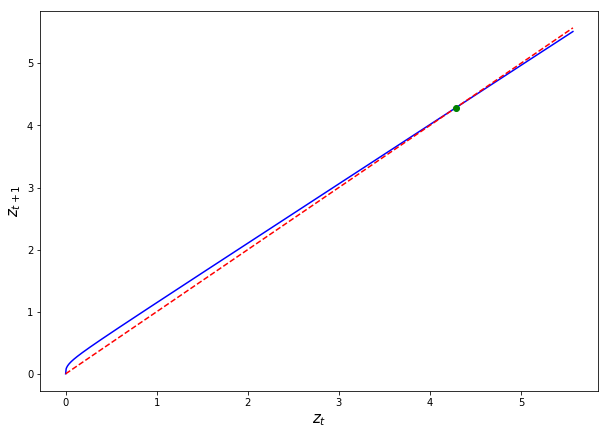

In [12]:
zmin  = 0                             # Minimum x-value of the plot
zmax  = z_ss*1.3                      # Maximum x-value of the plot
z_set = np.linspace(zmin, zmax, 1000) # Boundaries of x- and y-axis

phase = plt.figure(figsize=(10,7))    # Defines the phase diagram
plt.plot(z_set, aux_z(z_set,g,n,s,alpha,delta,beta), 'b-',    # Plots transition line
         z_set, z_set,     'r--',     # 45-degree line
         z_ss, z_ss,       'go')      # Plots point of steady state
plt.xlabel('$z_{t}$',   size=15)      # Labels x-axis
plt.ylabel('$z_{t+1}$', size=15)      # Labels y-axis

plt.show()

Finally, we plot an interactive phase diagram containing a slider for each of the parameters.

In [13]:
zmin  = 0                              # Minimum x-value of the plot
zmax  = z_ss*100                       # Maximum x-value of the plot
z_set = np.linspace(zmin, zmax, 10000) # Boundaries of x- and y-axis

def Transition(g,n,delta,s,alpha,beta):
    plt.figure(figsize=(10,7))                                   # Defines figure size
    z_ss = (s/(((1+n)*(1+g))**(beta / (beta+kappa))-(1-delta)))  # Defines function
    plt.xlim(0, z_ss*1.3)                                        # Defines limits
    plt.ylim(0, z_ss*1.3)                                        # Defines limits
    plt.locator_params(which='x', tight=True, nbins=10)          # Locates sliders
    plt.xlabel('$z_{t}$',   size=15)                             # Labels x-axis
    plt.ylabel('$z_{t+1}$', size=15)                             # Labels y-axis
    plt.plot(z_set,aux_z(z_set,g,n,s,alpha,delta,beta), '-b')    # Plots
    plt.plot(z_set,z_set, '--r')                                 # Plots 45-degree line
    plt.title('Phase diagram', size=25)                          # Creates title
    return print(f'The steady state for capital-output ratio is: {z_ss:.2f}')

widgets.interact(Transition,                                     # Defines slider
                 beta  = widgets.FloatSlider(min=0,max=2/3,step=0.01,value=1/3),
                 alpha = widgets.FloatSlider(min=0,max=2/3,step=0.01,value=1/3),
                 s     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.3),
                 n     = widgets.FloatSlider(min=0,max=0.3,step=0.01,value=0.02),
                 g     = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.02),
                 delta = widgets.FloatSlider(min=0,max=1,step=0.01,value=0.05))

interactive(children=(FloatSlider(value=0.02, description='g', max=1.0, step=0.01), FloatSlider(value=0.02, de…

<function __main__.Transition(g, n, delta, s, alpha, beta)>

# Part 3 - The Solow Model with Human Capital
With the extension of human capital, we now have the following production function:

$Y_t=K_t^{\alpha}H_t^{\phi}{(A_t L_t)}^{1-\alpha-\phi}$

## Parameter specification
We now define the new parameters.

In [14]:
# Defines parameters
phi = sm.symbols('phi') 
s_k = sm.symbols('s_k')
s_h = sm.symbols('s_h')

# Specifies parameter values
phi = 1/3
s_k = 0.2
s_h = 0.15

print("Parameters successfully set.")

Parameters successfully set.


## Solution and simulation of steady state

This time, we solve the model in terms of capital and human capital per effective worker, $k_t$ and $h_t$, respectively. These are given by:

$\tilde{k}^* = \left(\frac{s_k^{1-\phi} s_h^\phi}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}}$

$\tilde{h}^* = \left(\frac{s_k^{\alpha} s_h^{1-\alpha}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}}$

Again, we do this symbolic first.

In [15]:
# Steady state equation of capital
k1_ss_symbolic = ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi))    

# Steady state equation of human capital
h_ss_symbolic = ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi))

print(f'Symbolic method: Steady state of capital:       {k1_ss_symbolic:.8f}')
print(f'Symbolic method: Steady state of human capital: {h_ss_symbolic:.8f}')

Symbolic method: Steady state of capital:       8.12168159
Symbolic method: Steady state of human capital: 6.09126119


And now with bisection, where we solve:

$\tilde{k}^* - \left(\frac{s_k^{1-\phi} s_h^\phi}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}} = 0$

And:

$\tilde{h}^* - \left(\frac{s_k^{\alpha} s_h^{1-\alpha}}{n+g+\delta+ng}\right)^{\frac{1}{1-\alpha-\phi}} = 0$

Respectively.

In [16]:
f = lambda k_ss: k_ss - ((s_k**(1-phi)*s_h**phi) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)) 
h = lambda h_ss: h_ss - ((s_k**alpha*s_h**(1-alpha)) / (n+g+delta+(n*g)))**(1/(1-alpha-phi)) 

def bisection(f,a,b,tol=1e-8):

    # Test inputs
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        f_m_n = f(m_n)
        
        # Step 3: Determine sub-interval
        if abs(f_m_n) < tol:
            return m_n
        elif f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

k1_ss = bisection(f,0,100,1e-8)

print('Comparison of solution methods:')
print('')
print(f'Symbolic:  Steady state of capital per effective worker: {k1_ss_symbolic:.8f}')
print(f'Numerical: Steady state of capital per effective worker: {k1_ss:.8f}')

def bisection(h,a,b,tol=1e-8):

    # Test inputs
    if h(a) * h(b) >= 0:
        print("Bisection method fails.")
        return None
    
    # Step 1: Initializes
    a_n = a
    b_n = b
    
    # Step 2-4:
    while True:
        
        # Step 2: Midpoint and associated value
        m_n   = (a_n+b_n)/2
        h_m_n = h(m_n)
        
        # Step 3: Determine sub-interval
        if abs(h_m_n) < tol:
            return m_n
        elif h(a_n)*h_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif h(b_n)*h_m_n < 0:
            a_n = m_n
            b_n = b_n
        else:
            print("Bisection method fails.")
            return None
        
    return (a_n + b_n)/2

h_ss = bisection(h,0,100,1e-8)

print('')
print(f'Symbolic:  Steady state of capital per effective worker: {h_ss_symbolic:.8f}')
print(f'Numerical: Steady state of capital per effective worker: {h_ss:.8f}')

Comparison of solution methods:

Symbolic:  Steady state of capital per effective worker: 8.12168159
Numerical: Steady state of capital per effective worker: 8.12168159

Symbolic:  Steady state of capital per effective worker: 6.09126119
Numerical: Steady state of capital per effective worker: 6.09126119


Again, we see that the solution methods are equivalent.

Through the creation of an auxiliary equation, *$aux_k$* and *$aux_h$*, respectively, we now simulate the equilibrium path of the economy.

In [19]:
def aux_k(x,g,n,s_k,s_h,alpha,delta,phi):
    aux_k = ((n+g+delta+(n*g))/s_k)**(1/phi)*x**((1-alpha)/phi)
    return aux_k

def aux_h(x,g,n,s_k,s_h,alpha,delta,phi):
    aux_h = (s_h/(n+g+delta+(n*g)))**(1/(1-phi))*x**(alpha/(1-phi))
    return aux_h

## Plotting the phase diagram
Lastly, we plot the transition of capital and human capital in a standard phase diagram.

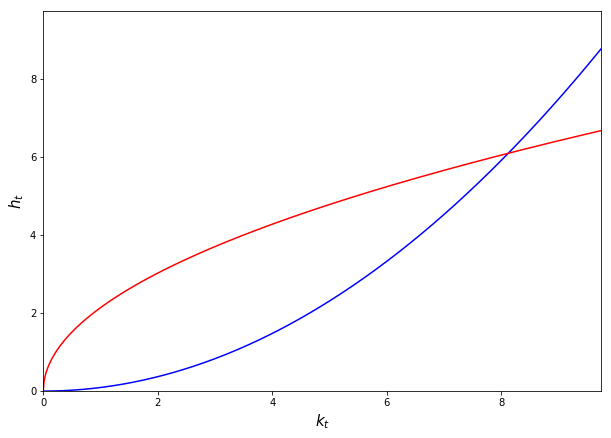

In [20]:
hmin  = 0                                # Minimum x-value of the plot
hmax  = max(h_ss*1.2, k1_ss*1.2)         # Maximum x-value of the plot
h_set = np.linspace(hmin, hmax, 1000)    # Boundaries of x- and y-axis

k1min  = 0                               # Minimum x-value of the plot
k1max  = max(h_ss*1.2, k1_ss*1.2)        # Maximum x-value of the plot
k1_set = np.linspace(k1min, k1max, 1000) # Boundaries of x- and y-axis

phase = plt.figure(figsize=(10,7))       # Defines figure size

plt.xlim(0, k1max)                       # Define limits
plt.ylim(0, hmax)                        # Define limits
plt.plot(k1_set, aux_k(k1_set,g,n,s_k,s_h,alpha,delta,phi), 'b-', # Plots transition line
         h_set, aux_h(k1_set,g,n,s_k,s_h,alpha,delta,phi), 'r-',) # Plots point of steady state
plt.xlabel('$k_{t}$',   size=15)         # Labels x-axis
plt.ylabel('$h_{t}$', size=15)           # Labels y-axis

plt.show()